In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import models

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [2]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [3]:
import os, shutil
train_dir = 'C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\cats_and_dogs_small\\train'
validation_dir = 'C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\cats_and_dogs_small\\validation'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1. /255)
test_datagen = ImageDataGenerator(rescale = 1. /255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 3000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)

model.save('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\models\\cats_and_dogs_small_1.h5')

C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 50s 490ms/step - loss: 0.6924 - acc: 0.5385 - val_loss: 0.6550 - val_acc: 0.7110
Epoch 2/30
100/100 [==============================] - 50s 495ms/step - loss: 0.6628 - acc: 0.6115 - val_loss: 0.6169 - val_acc: 0.7070
Epoch 3/30
100/100 [==============================] - 50s 500ms/step - loss: 0.6311 - acc: 0.6560 - val_loss: 0.6378 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 50s 498ms/step - loss: 0.5881 - acc: 0.7040 - val_loss: 0.5792 - val_acc: 0.7180
Epoch 5/30
100/100 [==============================] - 53s 528ms/step - loss: 0.5470 - acc: 0.7250 - val_loss: 0.6571 - val_acc: 0.6150
Epoch 6/30
100/100 [==============================] - 51s 512ms/step - loss: 0.5225 - acc: 0.7405 - val_loss: 0.5454 - val_acc: 0.7280
Epoch 7/30
100/100 [==============================] - 50s 498ms/step - loss: 0.4895 - acc: 0.7755 - val_loss: 0.5172 - val_acc: 0.7490
Epoch 8/30
100/100 [==============================] - 5

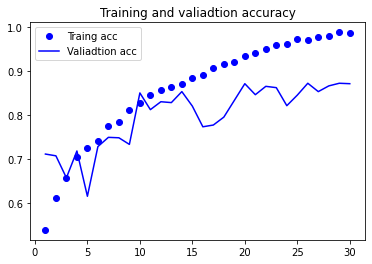

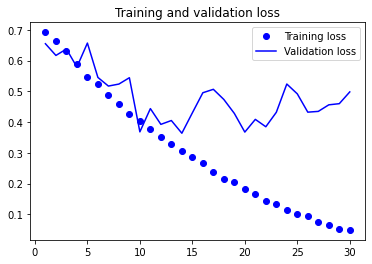

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Traing acc')
plt.plot(epochs, val_acc, 'b', label = 'Valiadtion acc')
plt.title('Training and valiadtion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
# 성능향상을 위해 데이터를 랜덤변환
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest' 
)

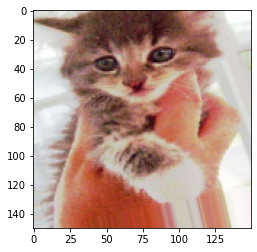

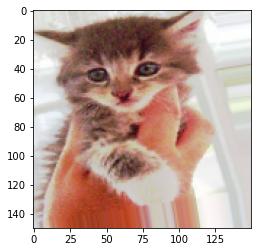

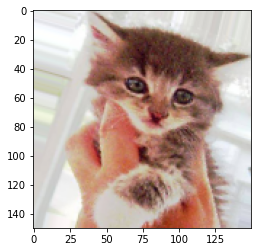

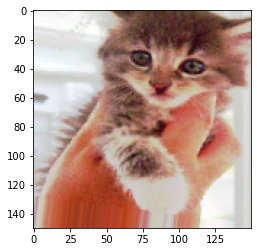

In [32]:
from tensorflow.keras.preprocessing import image
train_cats_dir = 'C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\cats_and_dogs_small\\train\\cats'

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3]
img = image.load_img(img_path, target_size = (150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [5]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [18]:
# 성능향상을 위해 데이터를 랜덤변환
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest' 
)

from tensorflow.keras.preprocessing import image
train_cats_dir = 'C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\cats_and_dogs_small\\train\\cats'

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3]
img = image.load_img(img_path, target_size = (150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size = 1, 
    save_to_dir='C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\cats_and_dogs_small\\train\\cats\\데이터 증식', 
    save_prefix='cat', save_format='jpeg'):
    # imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    print(i)
    if i == 1:
        break

1


In [19]:
train_dir = 'C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\cats_and_dogs_small\\train'
validation_dir = 'C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\cats_and_dogs_small\\validation'

train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
    )


test_datagen = ImageDataGenerator(rescale = 1. /255) # 검증 데이터는 증식 X

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [24]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100, # steps_per_epoch=1000 // batch_size / steps_per_epoch * batch_size <= 훈련 샘플 수
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)
model.save('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\cats_and_dogs_small\\models\\cats_and_dogs_small_2.h5')

C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 85s 841ms/step - loss: 0.3645 - acc: 0.7837 - val_loss: 0.8372 - val_acc: 0.3006
Epoch 2/30
100/100 [==============================] - 87s 866ms/step - loss: 0.3611 - acc: 0.7837 - val_loss: 0.8253 - val_acc: 0.3738
Epoch 3/30
100/100 [==============================] - 85s 852ms/step - loss: 0.3507 - acc: 0.7959 - val_loss: 0.6856 - val_acc: 0.5462
Epoch 4/30
100/100 [==============================] - 92s 922ms/step - loss: 0.3424 - acc: 0.8116 - val_loss: 0.7772 - val_acc: 0.4194
Epoch 5/30
100/100 [==============================] - 87s 869ms/step - loss: 0.3397 - acc: 0.8087 - val_loss: 0.6005 - val_acc: 0.7306
Epoch 6/30
100/100 [==============================] - 82s 815ms/step - loss: 0.3295 - acc: 0.8188 - val_loss: 0.7174 - val_acc: 0.5169
Epoch 7/30
100/100 [==============================] - 80s 804ms/step - loss: 0.3356 - acc: 0.8084 - val_loss: 0.5580 - val_acc: 0.7681
Epoch 8/30
100/100 [==============================] - 9

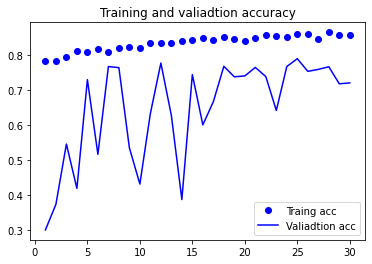

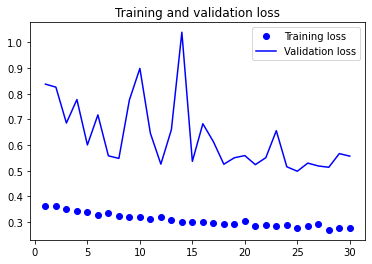

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Traing acc')
plt.plot(epochs, val_acc, 'b', label = 'Valiadtion acc')
plt.title('Training and valiadtion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()